In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from mplfinance.original_flavor import candlestick_ohlc
import math
from sklearn.metrics import mean_squared_error
import yfinance as yf
from yahoofinancials import YahooFinancials



**In this section, we want to build the LSTM model for the Apple stock price prediction, first, we collect the data from yahoo for start of year 2014 till the end of year 2018 and create a plot**

In [28]:
start = dt.datetime(2014,1,1)
end = dt.datetime(2018,12,31)
apple = yf.download('AAPL', start=start, end=end, progress=False)

<AxesSubplot:xlabel='Date'>

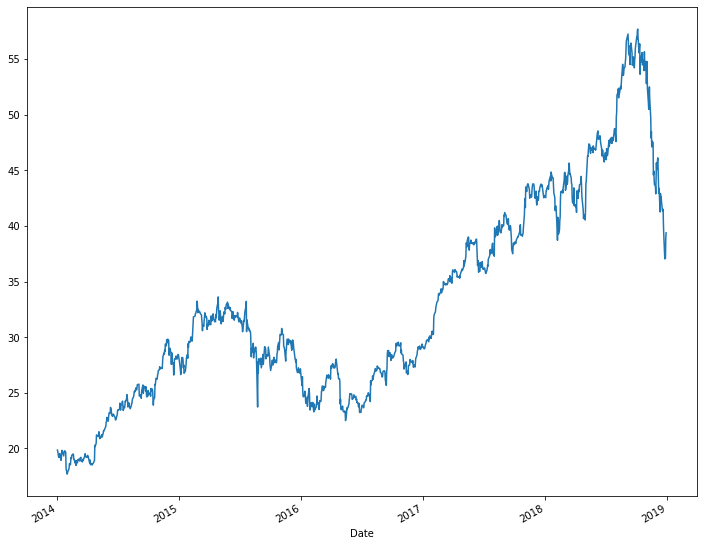

In [29]:
apple['Open'].plot(label = 'Apple open price', figsize=(12, 10))

**Next we use minmaxscaler to scale our Apple data**

In [30]:
apple1 = apple.reset_index()['Close']

In [31]:
scaler = MinMaxScaler()
apple1 = scaler.fit_transform(np.array(apple1).reshape(-1, 1))



**We divide our data to test and train set, we use 80% of the data for training and the rest for testing**

In [32]:
apple_train_data, apple_test_data = apple1[0: int(len(apple1)*0.8)], apple1[(int(len(apple1)*0.8)):]

In [33]:
apple_train_data.shape

(1005, 1)

In [34]:
timestep=1

def create_data(dataset, timestep):
    dataX = []
    dataY=[]
    for i in range (len(dataset)-timestep-1):
        dataX.append(dataset[i:(i+timestep), 0])
        dataY.append(dataset[i+timestep, 0])
    return np.array(dataX),  np.array(dataY)

In [35]:
apple_X_train, apple_y_train = create_data(apple_train_data, 100)
apple_X_test, apple_y_test = create_data(apple_test_data, 100)

**For the LSTM model we need our data to be 3 dimensional, so we reshape our X_train and X_test data by adding 1 to the third dimension**

In [36]:
apple_X_train = apple_X_train.reshape(apple_X_train.shape[0], apple_X_train.shape[1], 1)
apple_X_test = apple_X_test.reshape(apple_X_test.shape[0], apple_X_test.shape[1], 1)

In [37]:
apple_X_test.shape

(151, 100, 1)

**Next we create our LSTM model**

In [38]:
ap_model = Sequential()
ap_model.add(LSTM(50, return_sequences = True, input_shape=(100,1)))
ap_model.add(LSTM(50, return_sequences=True))
ap_model.add(LSTM(50))
ap_model.add(Dense(1))
ap_model.compile(loss='mean_squared_error', optimizer='adam', metrics = [tf.keras.metrics.MeanSquaredError()])




In [39]:
ap_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


**We fit our data to our model with epochs=100, batch_size 64**

In [40]:
history = ap_model.fit(apple_X_train, apple_y_train, validation_data=(apple_X_test, apple_y_test),  epochs=100, batch_size=64, verbose=1)

Epoch 1/100
15/15 [==============================] - 7s 155ms/step - loss: 0.0423 - mean_squared_error: 0.0423 - val_loss: 0.0912 - val_mean_squared_error: 0.0912
Epoch 2/100
15/15 [==============================] - 1s 83ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0204 - val_mean_squared_error: 0.0204
Epoch 3/100
15/15 [==============================] - 1s 85ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 4/100
15/15 [==============================] - 1s 86ms/step - loss: 9.1276e-04 - mean_squared_error: 9.1276e-04 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 5/100
15/15 [==============================] - 1s 83ms/step - loss: 9.1491e-04 - mean_squared_error: 9.1491e-04 - val_loss: 0.0086 - val_mean_squared_error: 0.0086
Epoch 6/100
15/15 [==============================] - 1s 90ms/step - loss: 9.5499e-04 - mean_squared_error: 9.5499e-04 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epo

15/15 [==============================] - 1s 88ms/step - loss: 3.8370e-04 - mean_squared_error: 3.8370e-04 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 50/100
15/15 [==============================] - 1s 88ms/step - loss: 4.8912e-04 - mean_squared_error: 4.8912e-04 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 51/100
15/15 [==============================] - 1s 86ms/step - loss: 4.8238e-04 - mean_squared_error: 4.8238e-04 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 52/100
15/15 [==============================] - 1s 84ms/step - loss: 4.1763e-04 - mean_squared_error: 4.1763e-04 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 53/100
15/15 [==============================] - 1s 86ms/step - loss: 3.6082e-04 - mean_squared_error: 3.6082e-04 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 54/100
15/15 [==============================] - 1s 89ms/step - loss: 4.1466e-04 - mean_squared_error: 4.1466e-04 - val_loss: 0.0018 - val_mean_squared_e

Epoch 97/100
15/15 [==============================] - 2s 135ms/step - loss: 2.9353e-04 - mean_squared_error: 2.9353e-04 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 98/100
15/15 [==============================] - 2s 158ms/step - loss: 3.3170e-04 - mean_squared_error: 3.3170e-04 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 99/100
15/15 [==============================] - 2s 105ms/step - loss: 2.6480e-04 - mean_squared_error: 2.6480e-04 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 100/100
15/15 [==============================] - 1s 91ms/step - loss: 2.5170e-04 - mean_squared_error: 2.5170e-04 - val_loss: 0.0010 - val_mean_squared_error: 0.0010


**we can see from our model that the loss is decreassing**


**Next we predict our train set and test set and use inverse_scaler to convert the data back to normal**

In [41]:
apple_train_pred = ap_model.predict(apple_X_train)
apple_test_pred = ap_model.predict(apple_X_test)

In [42]:
apple_train_pred = scaler.inverse_transform(apple_train_pred)
apple_test_pred = scaler.inverse_transform(apple_test_pred)
apple_train_data = scaler.inverse_transform(apple_train_data)
apple_test_data = scaler.inverse_transform(apple_test_data)

**We use the RMSE(standard deviation of residuals) both for training and testing data, to compute the accuracy of our model, relative to our dataset, the RMSE gave us a good score!**

In [43]:
math.sqrt(mean_squared_error(apple_y_test, apple_test_pred))

49.293360752328866

In [44]:
math.sqrt(mean_squared_error(apple_y_train, apple_train_pred))

30.311603848931533

**We use our predicted test data and predicted train data to plot our prediction. The blue line shows the actual prices, the orange shows our train data and the green line shows our test data. From the plot, we can see that our model did a good job predicting the stock price!**

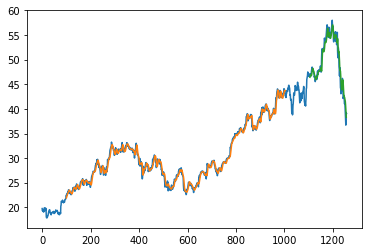

In [45]:
timestep3=100
apple_train_plot = np.empty_like(apple1)
apple_train_plot[:, :] = np.nan
apple_train_plot[timestep3: len(apple_train_pred)+timestep3, :] = apple_train_pred
apple_test_plot = np.empty_like(apple1)
apple_test_plot[:, :] = np.nan
apple_test_plot[len(apple_train_pred)+(timestep3*2)+1:len(apple1)-1, :] = apple_test_pred
plt.plot(scaler.inverse_transform(apple1))
plt.plot(apple_train_plot)
plt.plot(apple_test_plot)
plt.show()

**Next, we create a dataframe to show the actual prices versus our prediction for the last 150 days, next to each other. the test prediction was converted to list, and the dataframe was created**

In [46]:
apple_test_pred= apple_test_pred.tolist()

In [47]:
ap = apple['Close'][-151:] 
ap

Date
2018-05-24    47.037498
2018-05-25    47.145000
2018-05-29    46.974998
2018-05-30    46.875000
2018-05-31    46.717499
                ...    
2018-12-21    37.682499
2018-12-24    36.707500
2018-12-26    39.292500
2018-12-27    39.037498
2018-12-28    39.057499
Name: Close, Length: 151, dtype: float64

In [48]:
def extractDigits(lst):
    return [[el] for el in lst]
ap1 = extractDigits(ap)

In [49]:
df_apple = pd.DataFrame (ap1, columns=['actual'])

In [50]:
df_apple = pd.DataFrame (apple_test_pred, columns=['Prediction'])
df_apple['Actual'] = ap1

In [51]:
df_apple['Actual'] =  df_apple['Actual'].str.get(0)

In [52]:
df_apple.head(10)

,Prediction,Actual
0,46.424324,47.037498
1,46.589417,47.145000
2,46.747265,46.974998
3,46.885223,46.875000
4,46.932182,46.717499
5,46.890625,47.560001
6,46.775784,47.957500
7,46.883282,48.327499
8,47.199242,48.494999
9,47.627041,48.365002


**The result shows that the our prediction did a great job predicting the stock prices, for the most part our precition was very close to the actual price!**